In [1]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \large 
Z_{n+1} = Z_{n}^(-e^(Z_{n}^p)^(e(Z_{n}^p)^(-e(Z_{n}^p)^(e(Z_{n}^p)^(-e(Z_{n}^p)^(e(Z_{n}^p)^(-e(Z_{n}^p))))))))
\end{eqnarray}""")

<IPython.core.display.Latex object>

# mollusk figure: a numerical oddity.

    Sequential iteration of difference equation:
    Z = Z^(-exp(Z^p)^(exp(Z^p)^(-exp(Z^p)^(exp(Z^p)^(-exp(Z^p)^(exp(Z^p)^(-exp(Z^p))))))))
    
    with parameter set:
    p = = -0.051448293230+0.304348945637i
    on the complex plane produces a bug like figure.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

In [3]:
def starfish_ish_II(Z, p, Z0=None, ET=None):
    """ Z = starfish_ish(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    Z = Z = Z**(-np.exp(Z**p)**(np.exp(Z**p)**(-np.exp(Z**p)**(np.exp(Z**p)**(\
                    -np.exp(Z**p)**(np.exp(Z**p)**(-np.exp(Z**p))))))))
    return Z

In [4]:
#                                        One of Two parameter sets on this page
par_set = {'n_rows': 800, 'n_cols': 800}
par_set['center_point'] = 0.0 + 0.0j
par_set['theta'] = 0.0
par_set['zoom'] = 5/8

par_set['it_max'] = 16
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()
p = -0.051448293230+0.304348945637j
list_tuple = [(starfish_ish_II, (p))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

38.524149894714355 	 total time


In [5]:
#                  Escape Time Graphical norm - graphically easier data
t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

converstion time =	 1.4115688800811768


coloring time =	 3.5698060989379883


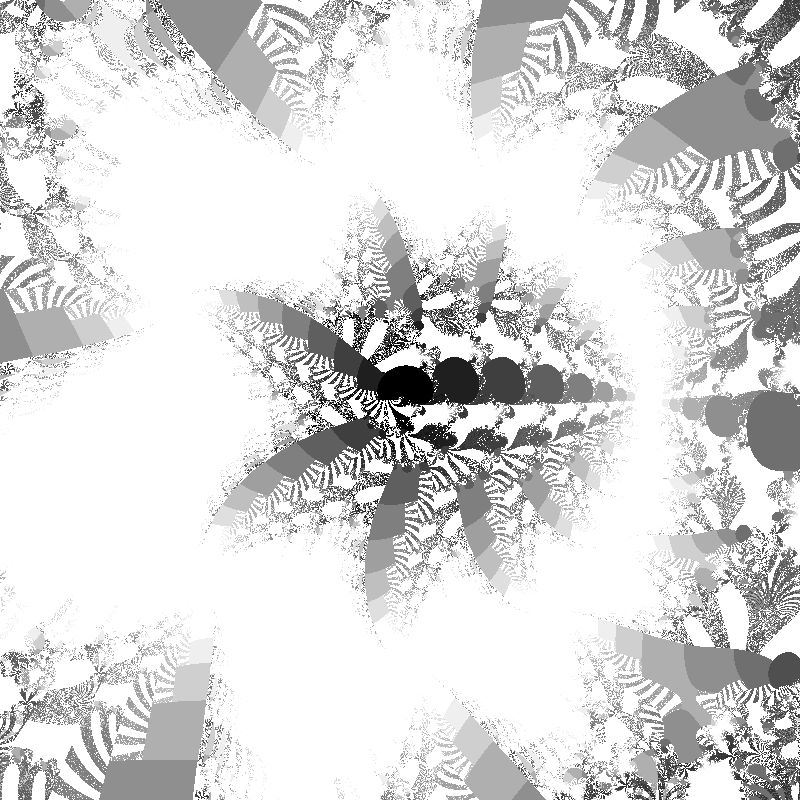

In [6]:
#                  Escape Time: darker escaped sooner
t0 = time.time()
ETd = ncp.mat_to_gray(ETn)
print('coloring time =\t',time.time() - t0)
display(ETd)

coloring time =	 3.588730812072754


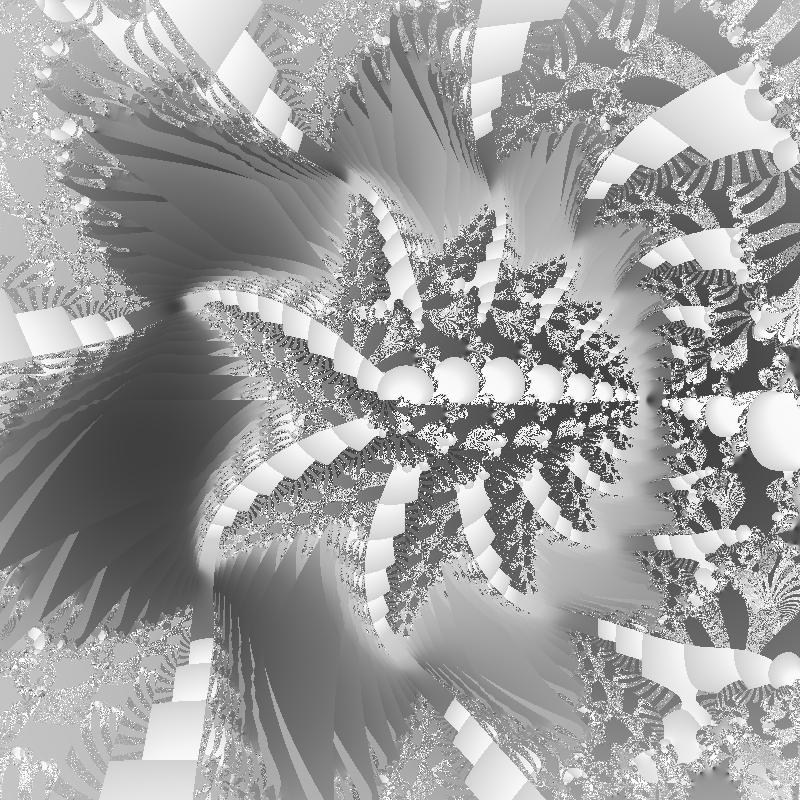

In [7]:
#                  Distance at Escape Time: lighter traveled further
t0 = time.time()
D = ncp.mat_to_gray(Zd, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(D)

coloring time =	 3.5487821102142334


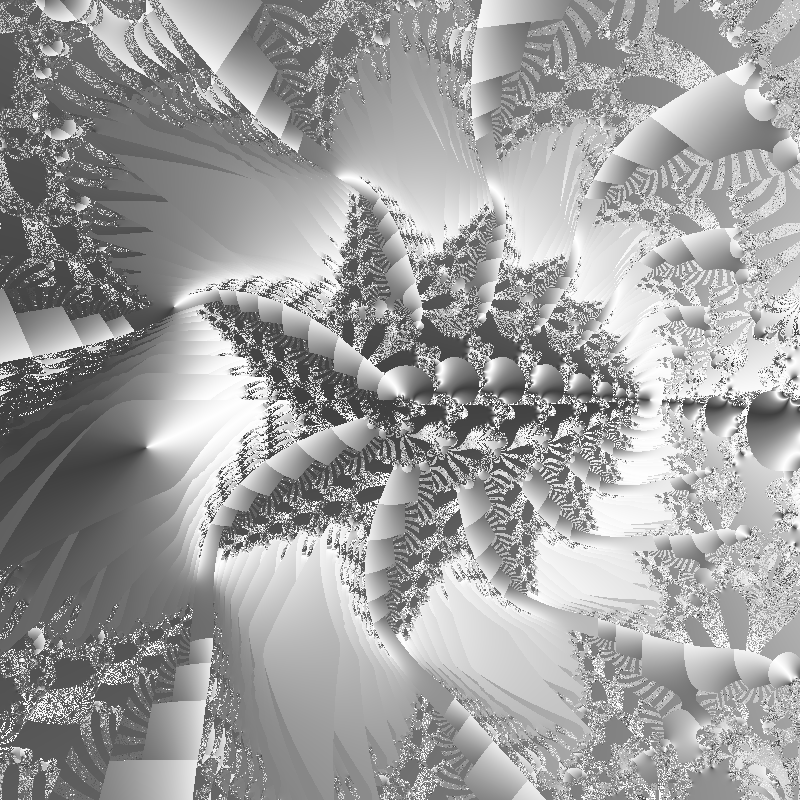

In [8]:
#                  Rotation at Escape Time: lighter rotated more
t0 = time.time()
R = ncp.mat_to_gray(Zr, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(R)

coloring time:	 5.557682752609253


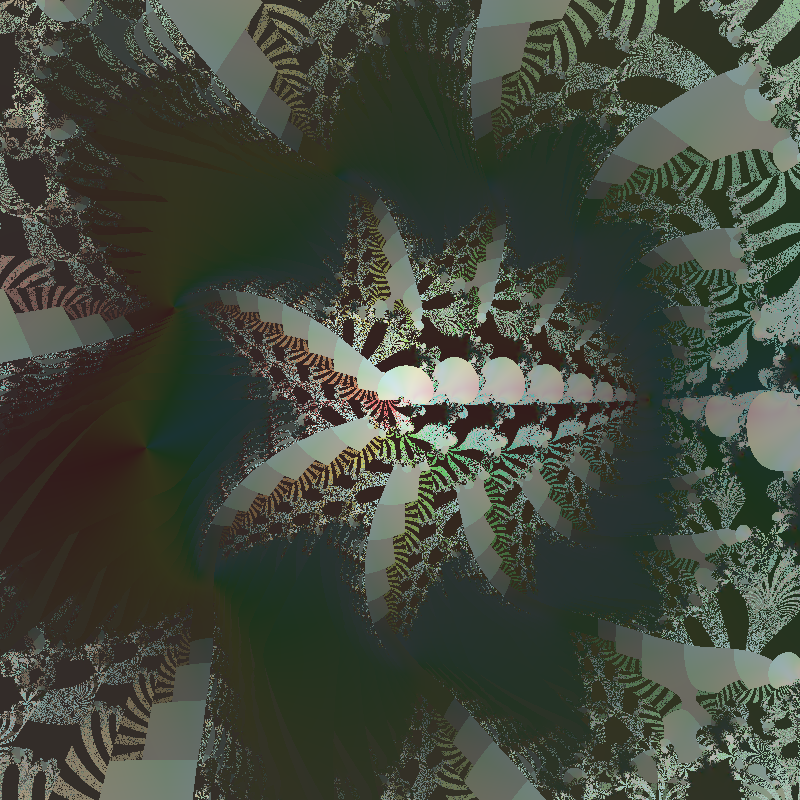

In [9]:
#                  Rotation > Hue, Distance > Saturation, Escape Time > Value (intensity-brightness) (muted)
H = Zr
S = 1 - ncp.graphic_norm(Zd)
V = 1 - ncp.graphic_norm(ET)

Hue_width = 0.5
H_min = 0.0
H_max = H_min + Hue_width

S_max = 0.5
S_min = 0.05

V_max = 0.9
V_min = 0.2
t0 = time.time()
Ihsv = ncp.normat_hsv_intrgb(H, S, V, H_max, H_min, S_max, S_min, V_max, V_min)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 5.943754196166992


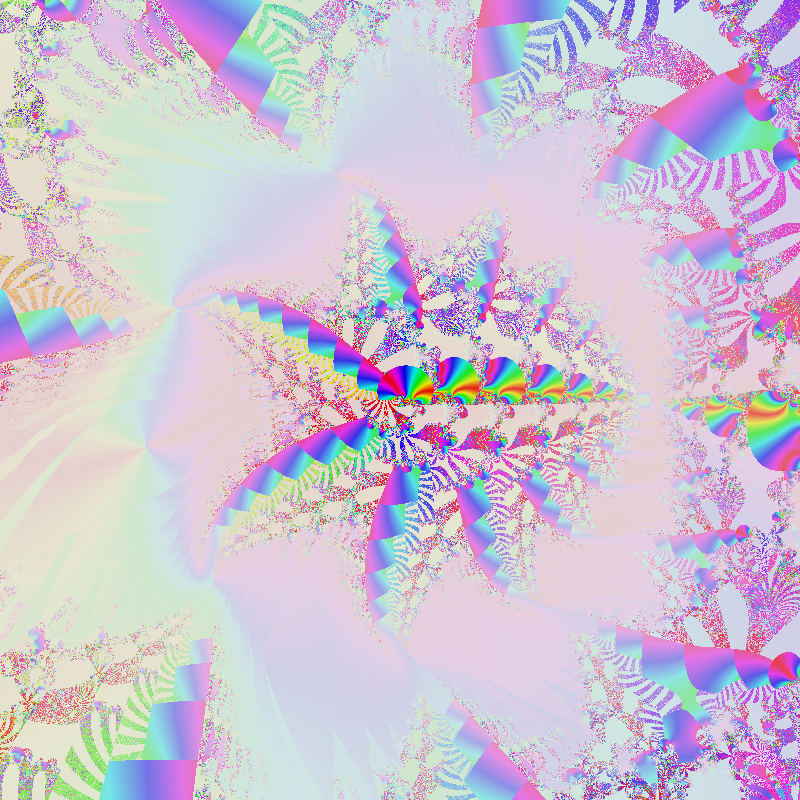

In [10]:
#                  Rotation > Hue, Escape Time > Saturation, Distance > Value (no significantly muted)
Z_v = Z-Z0
H = ncp.graphic_norm(np.arctan2(np.imag(Z_v), np.real(Z_v)))
S = 1 - ncp.graphic_norm(ET)
V = 1 - ncp.graphic_norm(Z_v)

Hue_width = 1.0
H_min = 0.0
H_max = H_min+Hue_width

S_max = 1.0
S_min = 0.1

V_max = 0.9
V_min = 0.0
t0 = time.time()
I = ncp.normat_hsv_intrgb(H, S, V, H_max, H_min, S_max, S_min, V_max, V_min)
print('coloring time:\t',time.time() - t0)
display(I)

In [11]:
#                                        Second of Two parameter sets on this page
par_set = {'n_rows': 800, 'n_cols': 800}
par_set['center_point'] = 0.0 + 0.0j
par_set['theta'] = 0.0
par_set['zoom'] = 5/8

par_set['it_max'] = 16
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()
p = 0.092988926871+0.463489247762j
list_tuple = [(starfish_ish_II, (p))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

36.982138872146606 	 total time


In [12]:
#                  Escape Time Graphical norm - graphically easier data
t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

converstion time =	 1.4096808433532715


coloring time =	 3.618358850479126


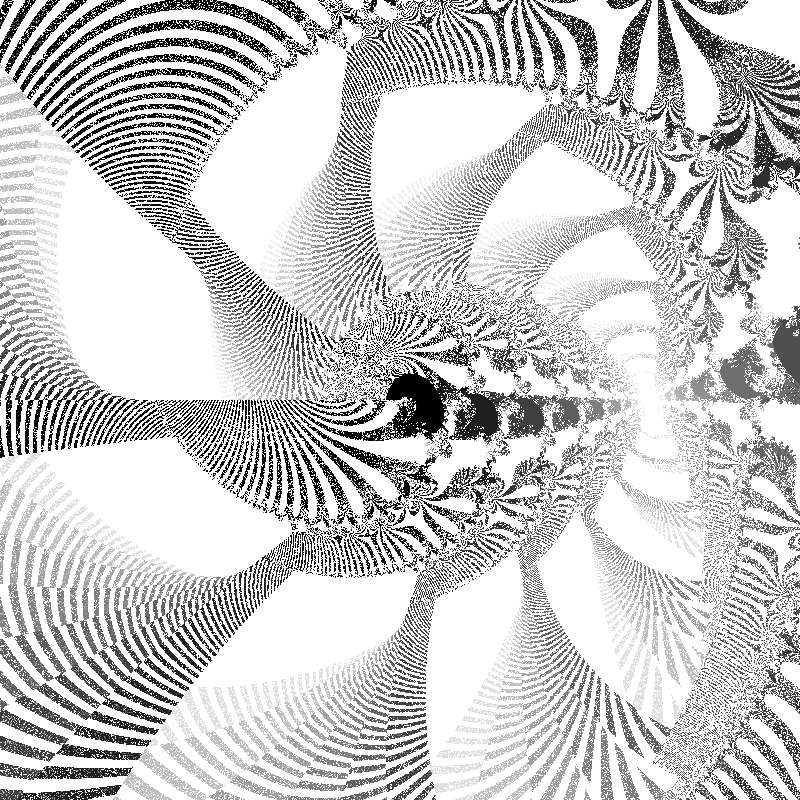

In [17]:
#                  Escape Time: darker escaped sooner
t0 = time.time()
ETd = ncp.mat_to_gray(ETn)
print('coloring time =\t',time.time() - t0)
display(ETd)

coloring time =	 3.3133440017700195


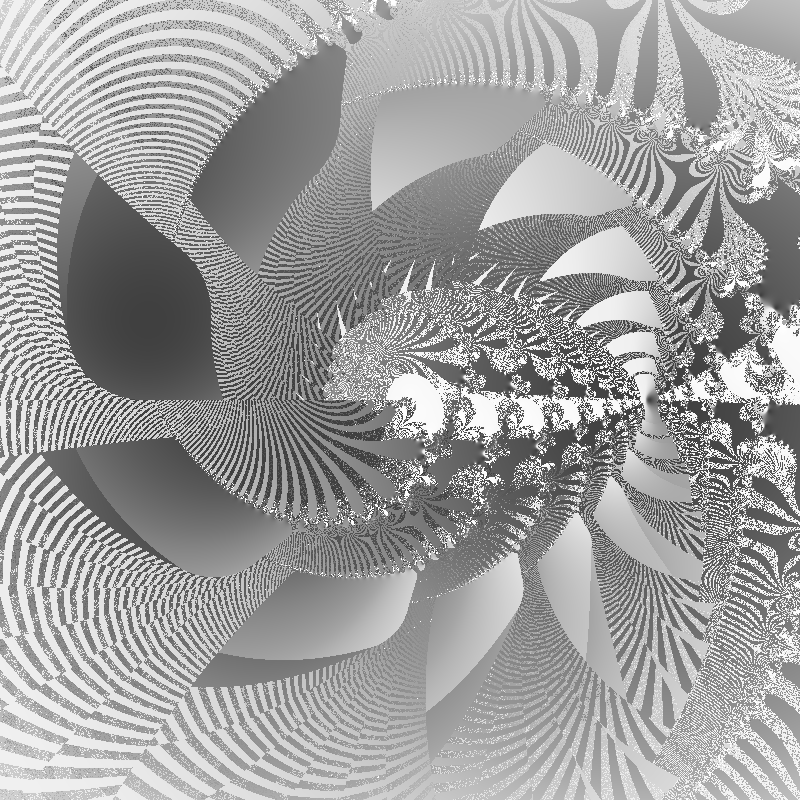

In [14]:
#                  Distance at Escape Time: lighter traveled further
t0 = time.time()
D = ncp.mat_to_gray(Zd, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(D)

coloring time =	 3.3635640144348145


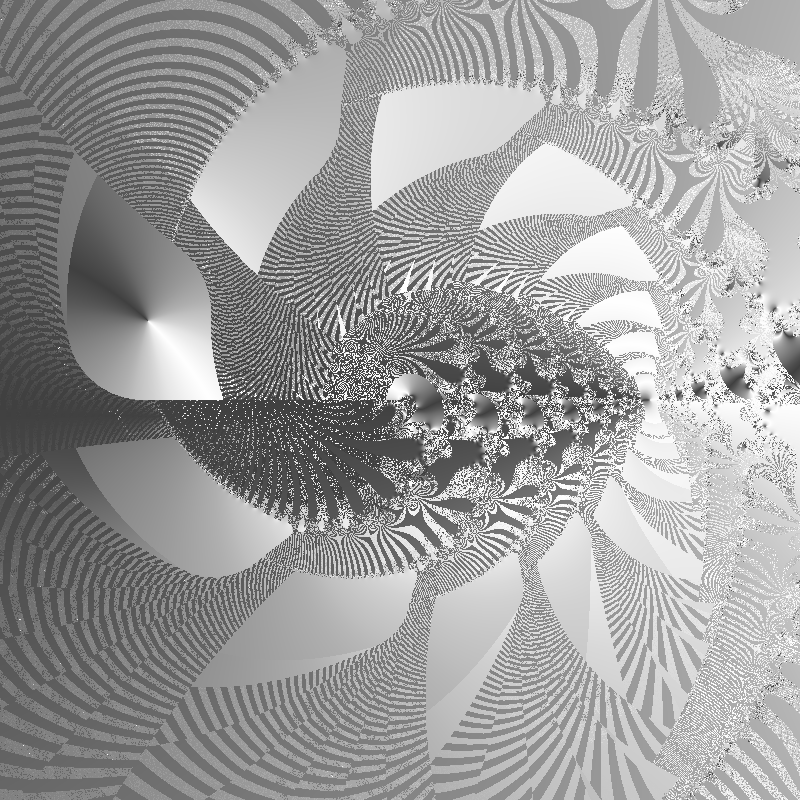

In [15]:
#                  Rotation at Escape Time: lighter rotated more
t0 = time.time()
R = ncp.mat_to_gray(Zr, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(R)

coloring time:	 5.563561916351318


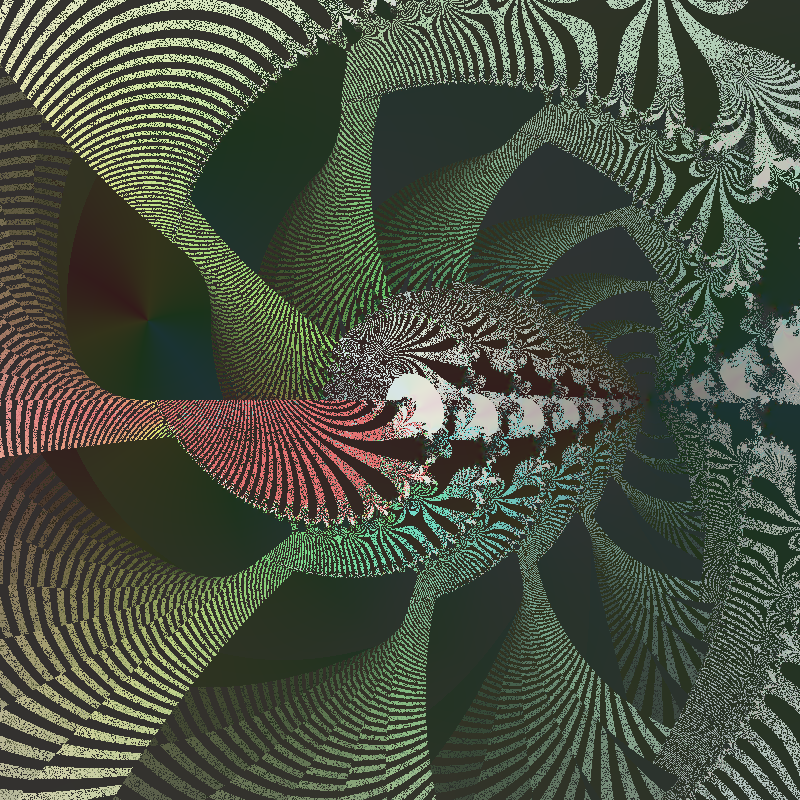

In [16]:
#                  Rotation > Hue, Distance > Saturation, Escape Time > Value (intensity-brightness) (muted)
H = Zr
S = 1 - ncp.graphic_norm(Zd)
V = 1 - ncp.graphic_norm(ET)

Hue_width = 0.5
H_min = 0.0
H_max = H_min + Hue_width

S_max = 0.5
S_min = 0.05

V_max = 0.9
V_min = 0.2
t0 = time.time()
Ihsv = ncp.normat_hsv_intrgb(H, S, V, H_max, H_min, S_max, S_min, V_max, V_min)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 6.154058933258057


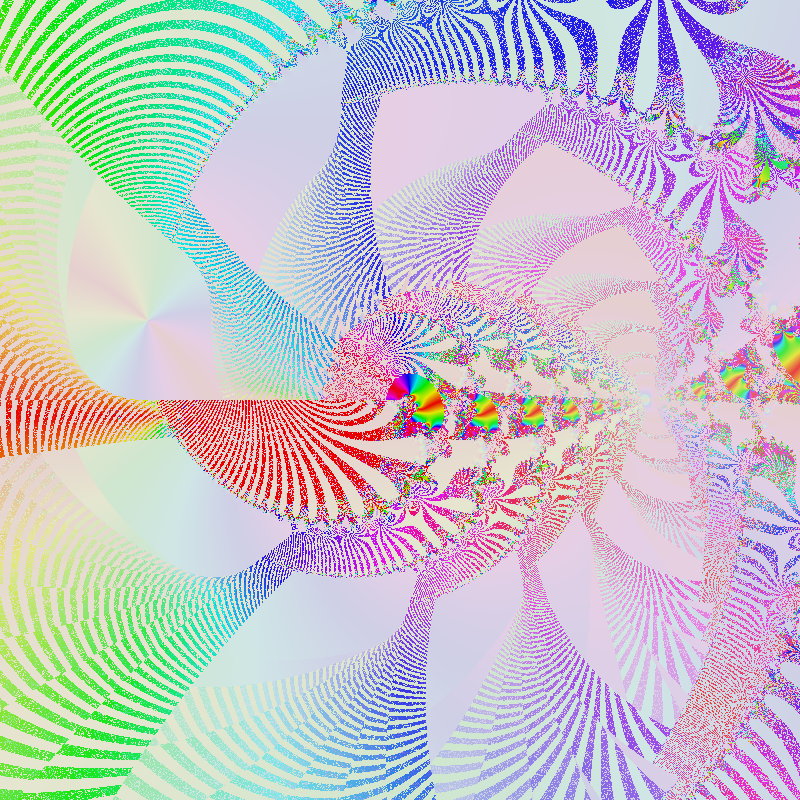

In [18]:
#                  Rotation > Hue, Escape Time > Saturation, Distance > Value (no significantly muted)
Z_v = Z-Z0
H = ncp.graphic_norm(np.arctan2(np.imag(Z_v), np.real(Z_v)))
S = 1 - ncp.graphic_norm(ET)
V = 1 - ncp.graphic_norm(Z_v)

Hue_width = 1.0
H_min = 0.0
H_max = H_min+Hue_width

S_max = 1.0
S_min = 0.1

V_max = 0.9
V_min = 0.0
t0 = time.time()
I = ncp.normat_hsv_intrgb(H, S, V, H_max, H_min, S_max, S_min, V_max, V_min)
print('coloring time:\t',time.time() - t0)
display(I)

In [21]:
#                                        Second of Two parameter sets on this page
par_set = {'n_rows': 200, 'n_cols': 200}
par_set['center_point'] = 0.0 + 0.0j
par_set['theta'] = 0.0
par_set['zoom'] = 5/8

par_set['it_max'] = 16
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()
p = 0.092988926871+0.463489247762j
list_tuple = [(starfish_ish_II, (p))]

t0 = time.time()
ET_sm, Z_sm, Z0_zm = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

2.40871000289917 	 total time


ET =	 1


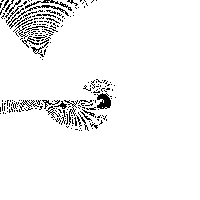

ET =	 2


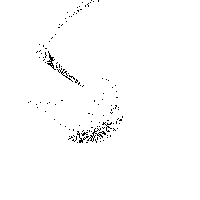

ET =	 3


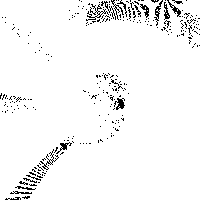

ET =	 4


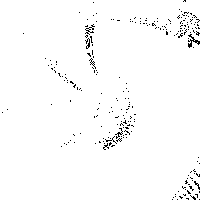

ET =	 5


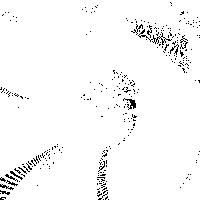

ET =	 6


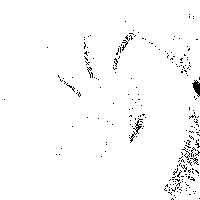

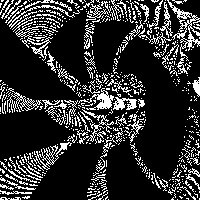

In [22]:
#                                        view smaller - individual escape time starting points
for t in range(1,7):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > 7] = 0
display(ncp.mat_to_gray(I))

In [23]:
#                                        view smaller - individual escape time frequency
for k in range(0,int(ET_sm.max())):
    print(k, (ET_sm == k).sum())
print('\nHow many never escaped:\n>',(ET_sm > k).sum())

0 0
1 1986
2 446
3 1564
4 717
5 1126
6 836
7 836
8 642
9 684
10 392
11 696
12 294
13 884
14 235
15 700
16 233

How many never escaped:
> 27729


In [25]:
#                           get the list of unescaped starting points and look for orbit points
Z_overs = Z0[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('One Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

One Unescaped Vector:
	V =  2.26 135.0 degrees

    27729 total unescaped points

   points near V       (plane units)
    11281 within V/ 1  (2.263)
     2641 within V/ 2  (1.131)
     1076 within V/ 3  (0.754)
      591 within V/ 4  (0.566)
      372 within V/ 5  (0.453)
      267 within V/ 6  (0.377)
      190 within V/ 7  (0.323)
      150 within V/ 8  (0.283)
      115 within V/ 9  (0.251)
       97 within V/10  (0.226)
       77 within V/11  (0.206)


2.0291292667388916 	 total time
converstion time =	 0.07144689559936523 
	Distance


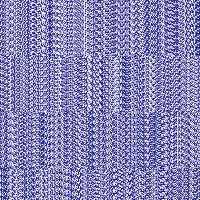

	Rotation


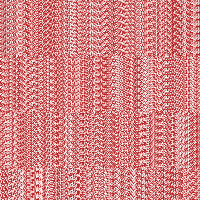

	Escape Time


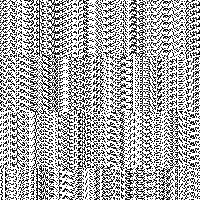

In [28]:
#             Project equation on scaled random plane parallel
#                                        Second of Two parameter sets on this page
par_s = {'n_rows': 200, 'n_cols': 200}
par_s['center_point'] = 0.0 + 0.0j
par_s['theta'] = 0.0
par_s['zoom'] = 5/8

par_s['it_max'] = 16
par_s['max_d'] = 10 / par_set['zoom']
par_s['dir_path'] = os.getcwd()

p = 0.092988926871+0.463489247762j
list_tuple_s = [(starfish_ish_II, (p))]

par_s['RANDOM_PLANE'] = True

t0 = time.time()
ET_s, Z_s, Z0_s = ig.get_primitives(list_tuple_s, par_s)
print(time.time() - t0, '\t total time')
t0 = time.time()
Zd_s, Zr_s, ETn_s = ncp.etg_norm(Z0_s, Z_s, ET_s)

print('converstion time =\t',time.time() - t0,'\n\tDistance')
display(ncp.mat_to_blue(Zd_s))
print('\tRotation')
display(ncp.mat_to_red(Zr_s))
print('\tEscape Time')
display(ncp.mat_to_gray(ETn_s))